Text(0, 0.5, 'Counts')

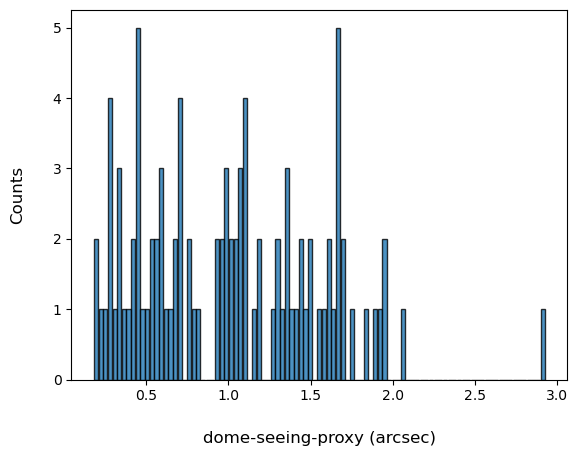

In [1]:
import pandas as pd

file = "D:/astro/domecam/together.xlsx"
df = pd.read_excel(file)

ax = df['seeing'].hist(bins=len(df['seeing']), grid=False, edgecolor='black', rwidth=0.9, alpha=0.8)
ax.set_xlabel("dome-seeing-proxy (arcsec)", labelpad=20, size=12)
ax.set_ylabel("Counts", labelpad=20, size=12)

Text(0, 0.5, 'Cumulative probability')

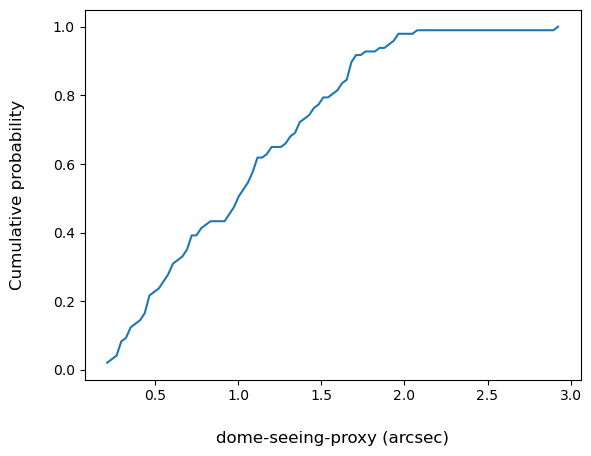

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
count, bins_count = np.histogram(df['seeing'], bins=len(df['seeing']))
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
plt.plot(bins_count[1:], cdf) 
plt.xlabel("dome-seeing-proxy (arcsec)", labelpad=20, size=12)
plt.ylabel("Cumulative probability", labelpad=20, size=12)

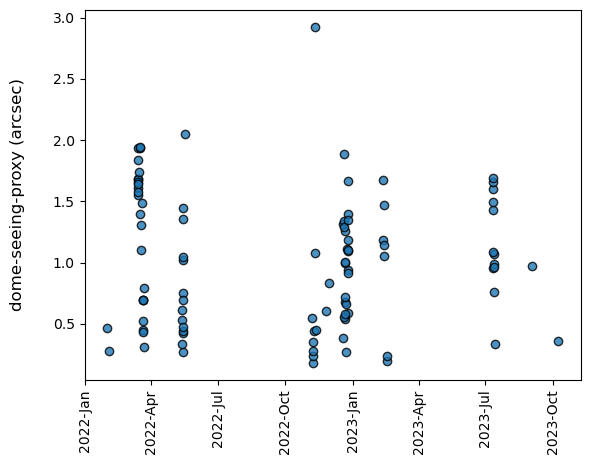

In [3]:
from datetime import datetime, timedelta
file_date = []
file_date_month_only = []
for item in df['file']:
    file_time = datetime.strptime(item.replace('DC', '').replace('_2km.fits',''), '%y%m%d%H%M%S')
    file_date.append(f'{file_time.day} {file_time.strftime("%b")} {file_time.year}')
    file_date_month_only.append(f'{file_time.strftime("%b")} {file_time.year}')

df2 = df.assign(file_date=file_date)
df2 = df2.assign(month_only=file_date_month_only)

df2['file_date'] = pd.to_datetime(df2['file_date'], format='%d %b %Y')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


ax = plt.gca()
ax.scatter(df2['file_date'], df2["seeing"], edgecolor='black', alpha=0.8)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,12,3))) # шаг по месяцам
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b')) # формат отображения даты
    
plt.setp(ax.get_xticklabels(), rotation=90) 
plt.ylabel("dome-seeing-proxy (arcsec)", labelpad=20, size=12)
plt.show()

In [ ]:
mirror_temperature = (df['ts_1'] + df['ts_2'] + df['ts_3'])/3
indoor_temperuature = (df['ts_15'] + df['ts_17'] + df['ts_19'])/3
outdoor_temperuature = df['temperature']

Text(0.5, 0, 'Wind speed (m/s)')

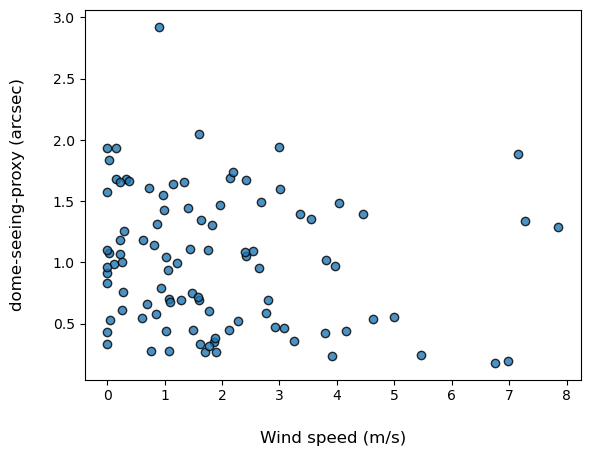

In [4]:
plt.scatter(df['wind speed'], df['seeing'], edgecolor='black', alpha=0.8)
plt.ylabel("dome-seeing-proxy (arcsec)", labelpad=20, size=12)
plt.xlabel("Wind speed (m/s)", labelpad=20, size=12)

Text(0.5, 0, 'Indoor-Mirror ∆T (degrees)')

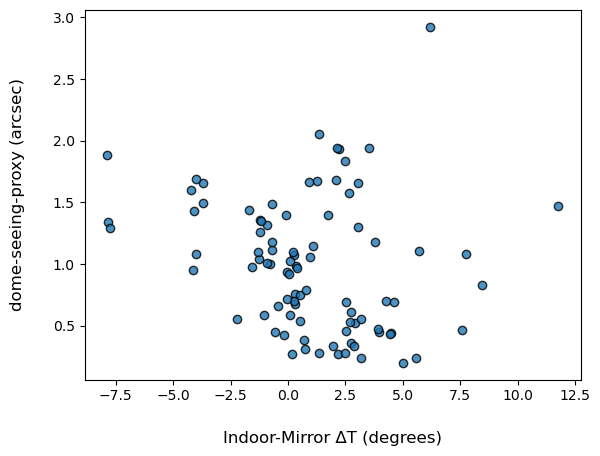

In [8]:
plt.scatter(indoor_temperuature - mirror_temperature, df['seeing'], edgecolor='black', alpha=0.8)
plt.ylabel("dome-seeing-proxy (arcsec)", labelpad=20, size=12)
plt.xlabel("Indoor-Mirror ∆T (degrees)", labelpad=20, size=12)

Text(0.5, 0, ' Outdoor-Indoor ∆T (degrees)')

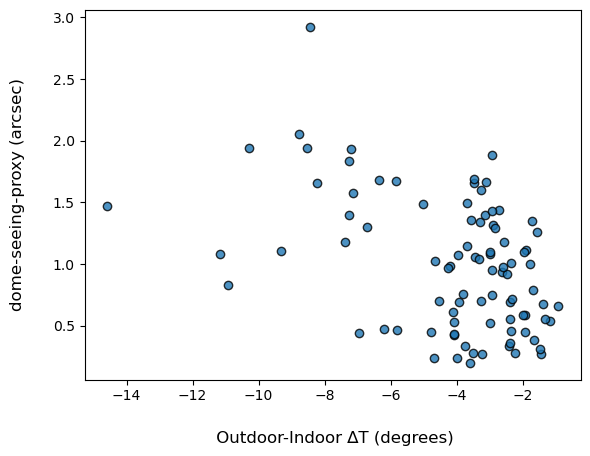

In [9]:
plt.scatter(outdoor_temperuature - indoor_temperuature, df['seeing'], edgecolor='black', alpha=0.8)
plt.ylabel("dome-seeing-proxy (arcsec)", labelpad=20, size=12)
plt.xlabel(" Outdoor-Indoor ∆T (degrees)", labelpad=20, size=12)